In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Tally votes from WhatsApp polls
data = {
    "Year Group": ["2Y", "3Y", "4Y", "1Y"],
    "T-shirt": [4, 4, 4, 8],
    "Hoodie": [32, 6, 4, 32],
    "Sweatshirt": [34, 16, 4, 13],
    "Notebook": [2, 0, 4, 7],
    "Tote bag": [23, 13, 8, 21],
    "Travel mug": [14, 11, 8, 9],
    "Mugs": [2, 0, 11, 3],
    "Pens": [1, 0, 4, 4],
    "Postcard": [1, 0, 1, 2],
    "Stickers": [0, 0, 4, 4],
    "£15 Hoodie Price": [0,0,0,0],
    "£20 Hoodie Price": [5,1,3,18],
    "£25 Hoodie Price": [28,10,0,13],
    "£30 Hoodie Price": [0,0,0,0],
}

df = pd.DataFrame(data)
df = df.set_index("Year Group").sort_index()

In [2]:
df

,T-shirt,Hoodie,Sweatshirt,Notebook,Tote bag,Travel mug,Mugs,Pens,Postcard,Stickers,£15 Hoodie Price,£20 Hoodie Price,£25 Hoodie Price,£30 Hoodie Price
Year Group,,,,,,,,,,,,,,
1Y,8,32,13,7,21,9,3,4,2,4,0,18,13,0
2Y,4,32,34,2,23,14,2,1,1,0,0,5,28,0
3Y,4,6,16,0,13,11,0,0,0,0,0,1,10,0
4Y,4,4,4,4,8,8,11,4,1,4,0,3,0,0


In [3]:
items_data = df.loc[:, "T-shirt":"Stickers"]
prices_data = df.loc[:, "£15 Hoodie Price":"£30 Hoodie Price"]

In [4]:
pastel_colors = {"1Y": "#FFC0CB", "2Y": "#77DD77", "3Y": "#89CFF0", "4Y": "#FFF79A"}

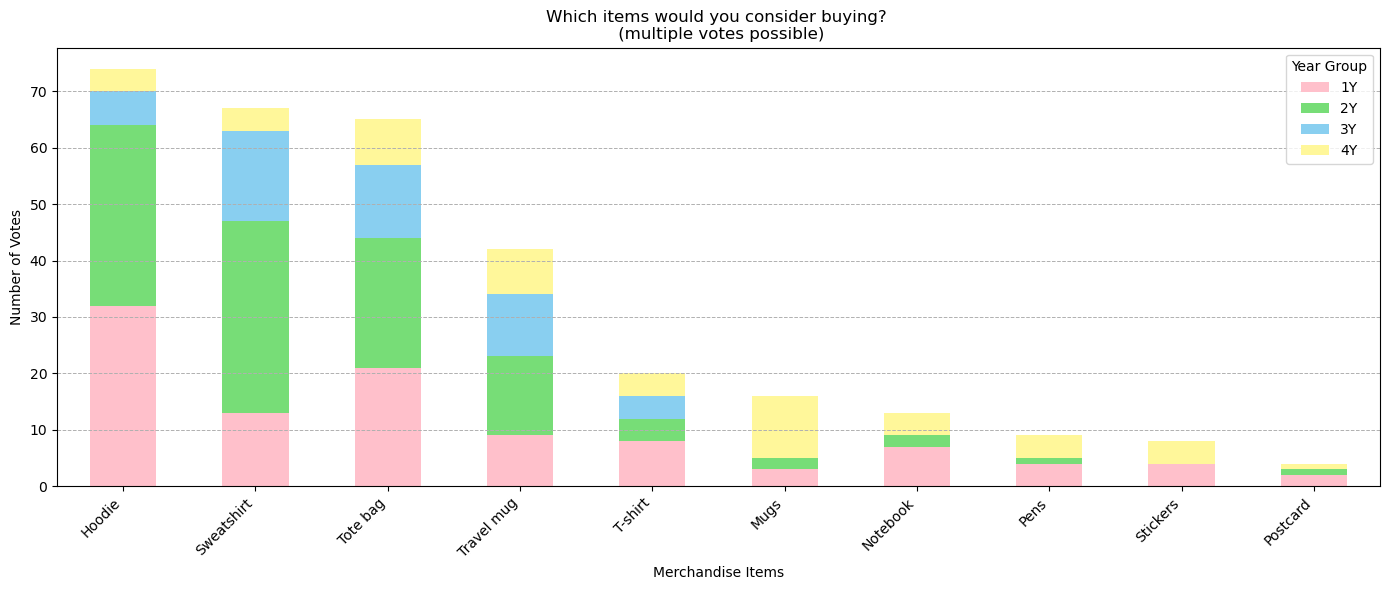

In [5]:
# Sort the items data by the total number of votes in descending order
sorted_items_data = items_data.sum(axis=0).sort_values(ascending=False)
sorted_items_data = items_data[sorted_items_data.index]

# Bar plot of item votes
fig, ax = plt.subplots(figsize=(14, 6))

sorted_items_data.T.plot(
    kind="bar",
    stacked=True,
    color=[pastel_colors[year] for year in sorted_items_data.index],
    ax=ax,
)
ax.set_title("Which items would you consider buying? \n (multiple votes possible)")
ax.set_ylabel("Number of Votes")
ax.set_xlabel("Merchandise Items")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.legend(title="Year Group")
ax.grid(axis="y", linestyle="--", linewidth=0.7)

plt.tight_layout()
plt.show()

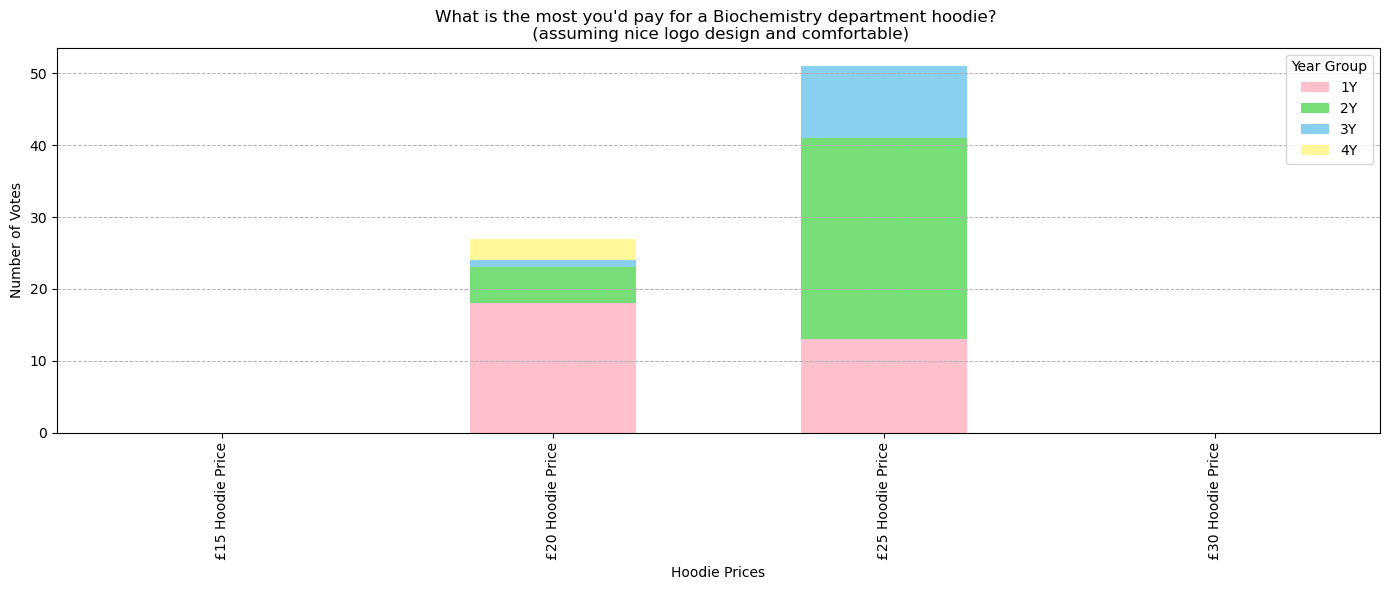

In [6]:
# Bar plots of votes for hoodie prices by year group

fig_prices, ax_prices = plt.subplots(figsize=(14, 6))
prices_data.T.plot(
    kind="bar",
    stacked=True,
    color=[pastel_colors[year] for year in prices_data.index],
    ax=ax_prices,
)
ax_prices.set_title("What is the most you'd pay for a Biochemistry department hoodie? \n (assuming nice logo design and comfortable)")
ax_prices.set_ylabel("Number of Votes")
ax_prices.set_xlabel("Hoodie Prices")
ax_prices.legend(title="Year Group")
ax_prices.grid(axis="y", linestyle="--", linewidth=0.7)
plt.tight_layout()

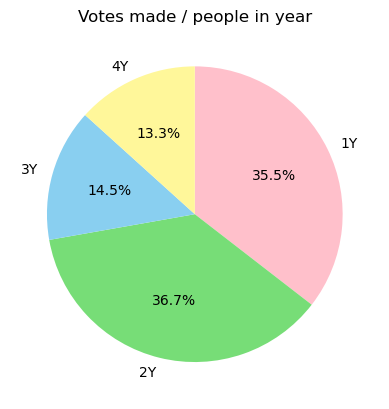

In [7]:
votes_per_year = df.sum(axis=1)
year_group_sizes = pd.Series({"1Y": 95, "2Y": 100, "3Y": 106, "4Y": 104})
normalized_votes = votes_per_year.div(year_group_sizes)

# Pie chart for the proportion of votes from each year
fig_pie, ax_pie = plt.subplots()
normalized_votes.plot(
    kind="pie",
    ax=ax_pie,
    colors=[pastel_colors[year] for year in votes_per_year.index],
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)
ax_pie.set_ylabel("")  # Clear the y-axis label
ax_pie.set_title("Votes made / people in year")
plt.show()